In [1]:
import pandas as pd
dataset=pd.read_csv('golf_df.csv')
dataset.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [2]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [3]:
df=dataset.iloc[:,:].values
df

array([['sunny', 'hot', 'high', False, 'no'],
       ['sunny', 'hot', 'high', True, 'no'],
       ['overcast', 'hot', 'high', False, 'yes'],
       ['rainy', 'mild', 'high', False, 'yes'],
       ['rainy', 'cool', 'normal', False, 'yes'],
       ['rainy', 'cool', 'normal', True, 'no'],
       ['overcast', 'cool', 'normal', True, 'yes'],
       ['sunny', 'mild', 'high', False, 'no'],
       ['sunny', 'cool', 'normal', False, 'yes'],
       ['rainy', 'mild', 'normal', False, 'yes'],
       ['sunny', 'mild', 'normal', True, 'yes'],
       ['overcast', 'mild', 'high', True, 'yes'],
       ['overcast', 'hot', 'normal', False, 'yes'],
       ['rainy', 'mild', 'high', True, 'no']], dtype=object)

In [4]:
df[:,0]=lb.fit_transform(df[:,0]).astype('int')
df[:,1]=lb.fit_transform(df[:,1]).astype('int')
df[:,2]=lb.fit_transform(df[:,2]).astype('int')
df[:,3]=lb.fit_transform(df[:,3]).astype('int')
df[:,4]=lb.fit_transform(df[:,4]).astype('int')

In [5]:
Y=pd.DataFrame(df)
Y.head()

,0,1,2,3,4
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [6]:
x=Y.iloc[:,:-1].astype('int')
y=Y.iloc[:,-1].astype('int')
x

,0,1,2,3
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [7]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: 4, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)
from sklearn import tree,metrics
dtree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_pred=dtree.predict(x_test)
print(y_pred)

[0 1 0 1 1 1 1]


In [20]:
count_missclassified=(y_test!=y_pred).sum()
count_missclassified

3

In [21]:
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy

0.5714285714285714

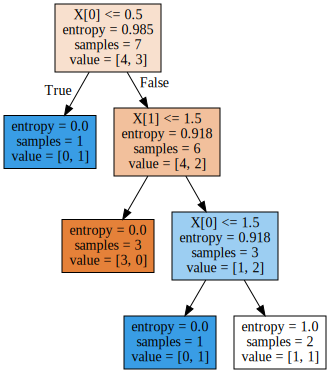

In [22]:
import graphviz
data=tree.export_graphviz(dtree,out_file=None,filled=True)
graph=graphviz.Source(data,format='png')
graph